In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mp

In [4]:
datos = pd.read_excel(r'/home/ubuntu/prec/data/data.xlsx', sheet_name='Datos')
datos.head(5)

,Entidad,Fecha,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_ope/Activos,ROA,ROE,Calidad,Utilidad/Ingresos
0,BANCAMÍA S. A.,2018-01-01,17.59,334.0,225.122316,82.101505,13.439939,1.649447,6.832722,5.288146,5.398005
1,BANCAMÍA S. A.,2018-02-01,17.52,290.4,212.079849,81.778429,13.299214,1.699940,7.028450,5.395301,5.543541


In [10]:
datos = datos.set_index('Fecha')

# Descripción de los datos

In [11]:
datos.shape

(1637, 10)

In [12]:
AtributosNumericos = datos.columns
AtributosNumericos = AtributosNumericos[1:]
print(AtributosNumericos)

Index(['Solvencia', 'IRL', 'Cartera/Depósitos', 'Cartera/Activos',
       'Gast_ope/Activos', 'ROA', 'ROE', 'Calidad', 'Utilidad/Ingresos'],
      dtype='object')


In [13]:
Estadisticas = pd.DataFrame(datos)
print(Estadisticas.describe())

         Solvencia          IRL  Cartera/Depósitos  Cartera/Activos  \
count  1637.000000  1637.000000        1637.000000      1637.000000   
mean     16.517122   257.727123         115.533089        72.342777   
std       4.886337   139.538432          33.797127        15.177788   
min       0.000000    99.500000          26.458246        18.450307   
25%      13.120000   161.000000          97.650273        69.327206   
50%      15.360000   216.000000         110.386953        75.833663   
75%      19.010000   310.600000         129.604245        80.740904   
max      35.490000  1154.900000         246.939010        98.500382   

       Gast_ope/Activos          ROA          ROE      Calidad  \
count       1637.000000  1637.000000  1637.000000  1637.000000   
mean           4.329825     1.072306     7.892189     4.649508   
std            3.327938     1.657460    12.369163     2.808125   
min            0.839461    -8.492747   -75.649607     0.000000   
25%            2.292735     0.

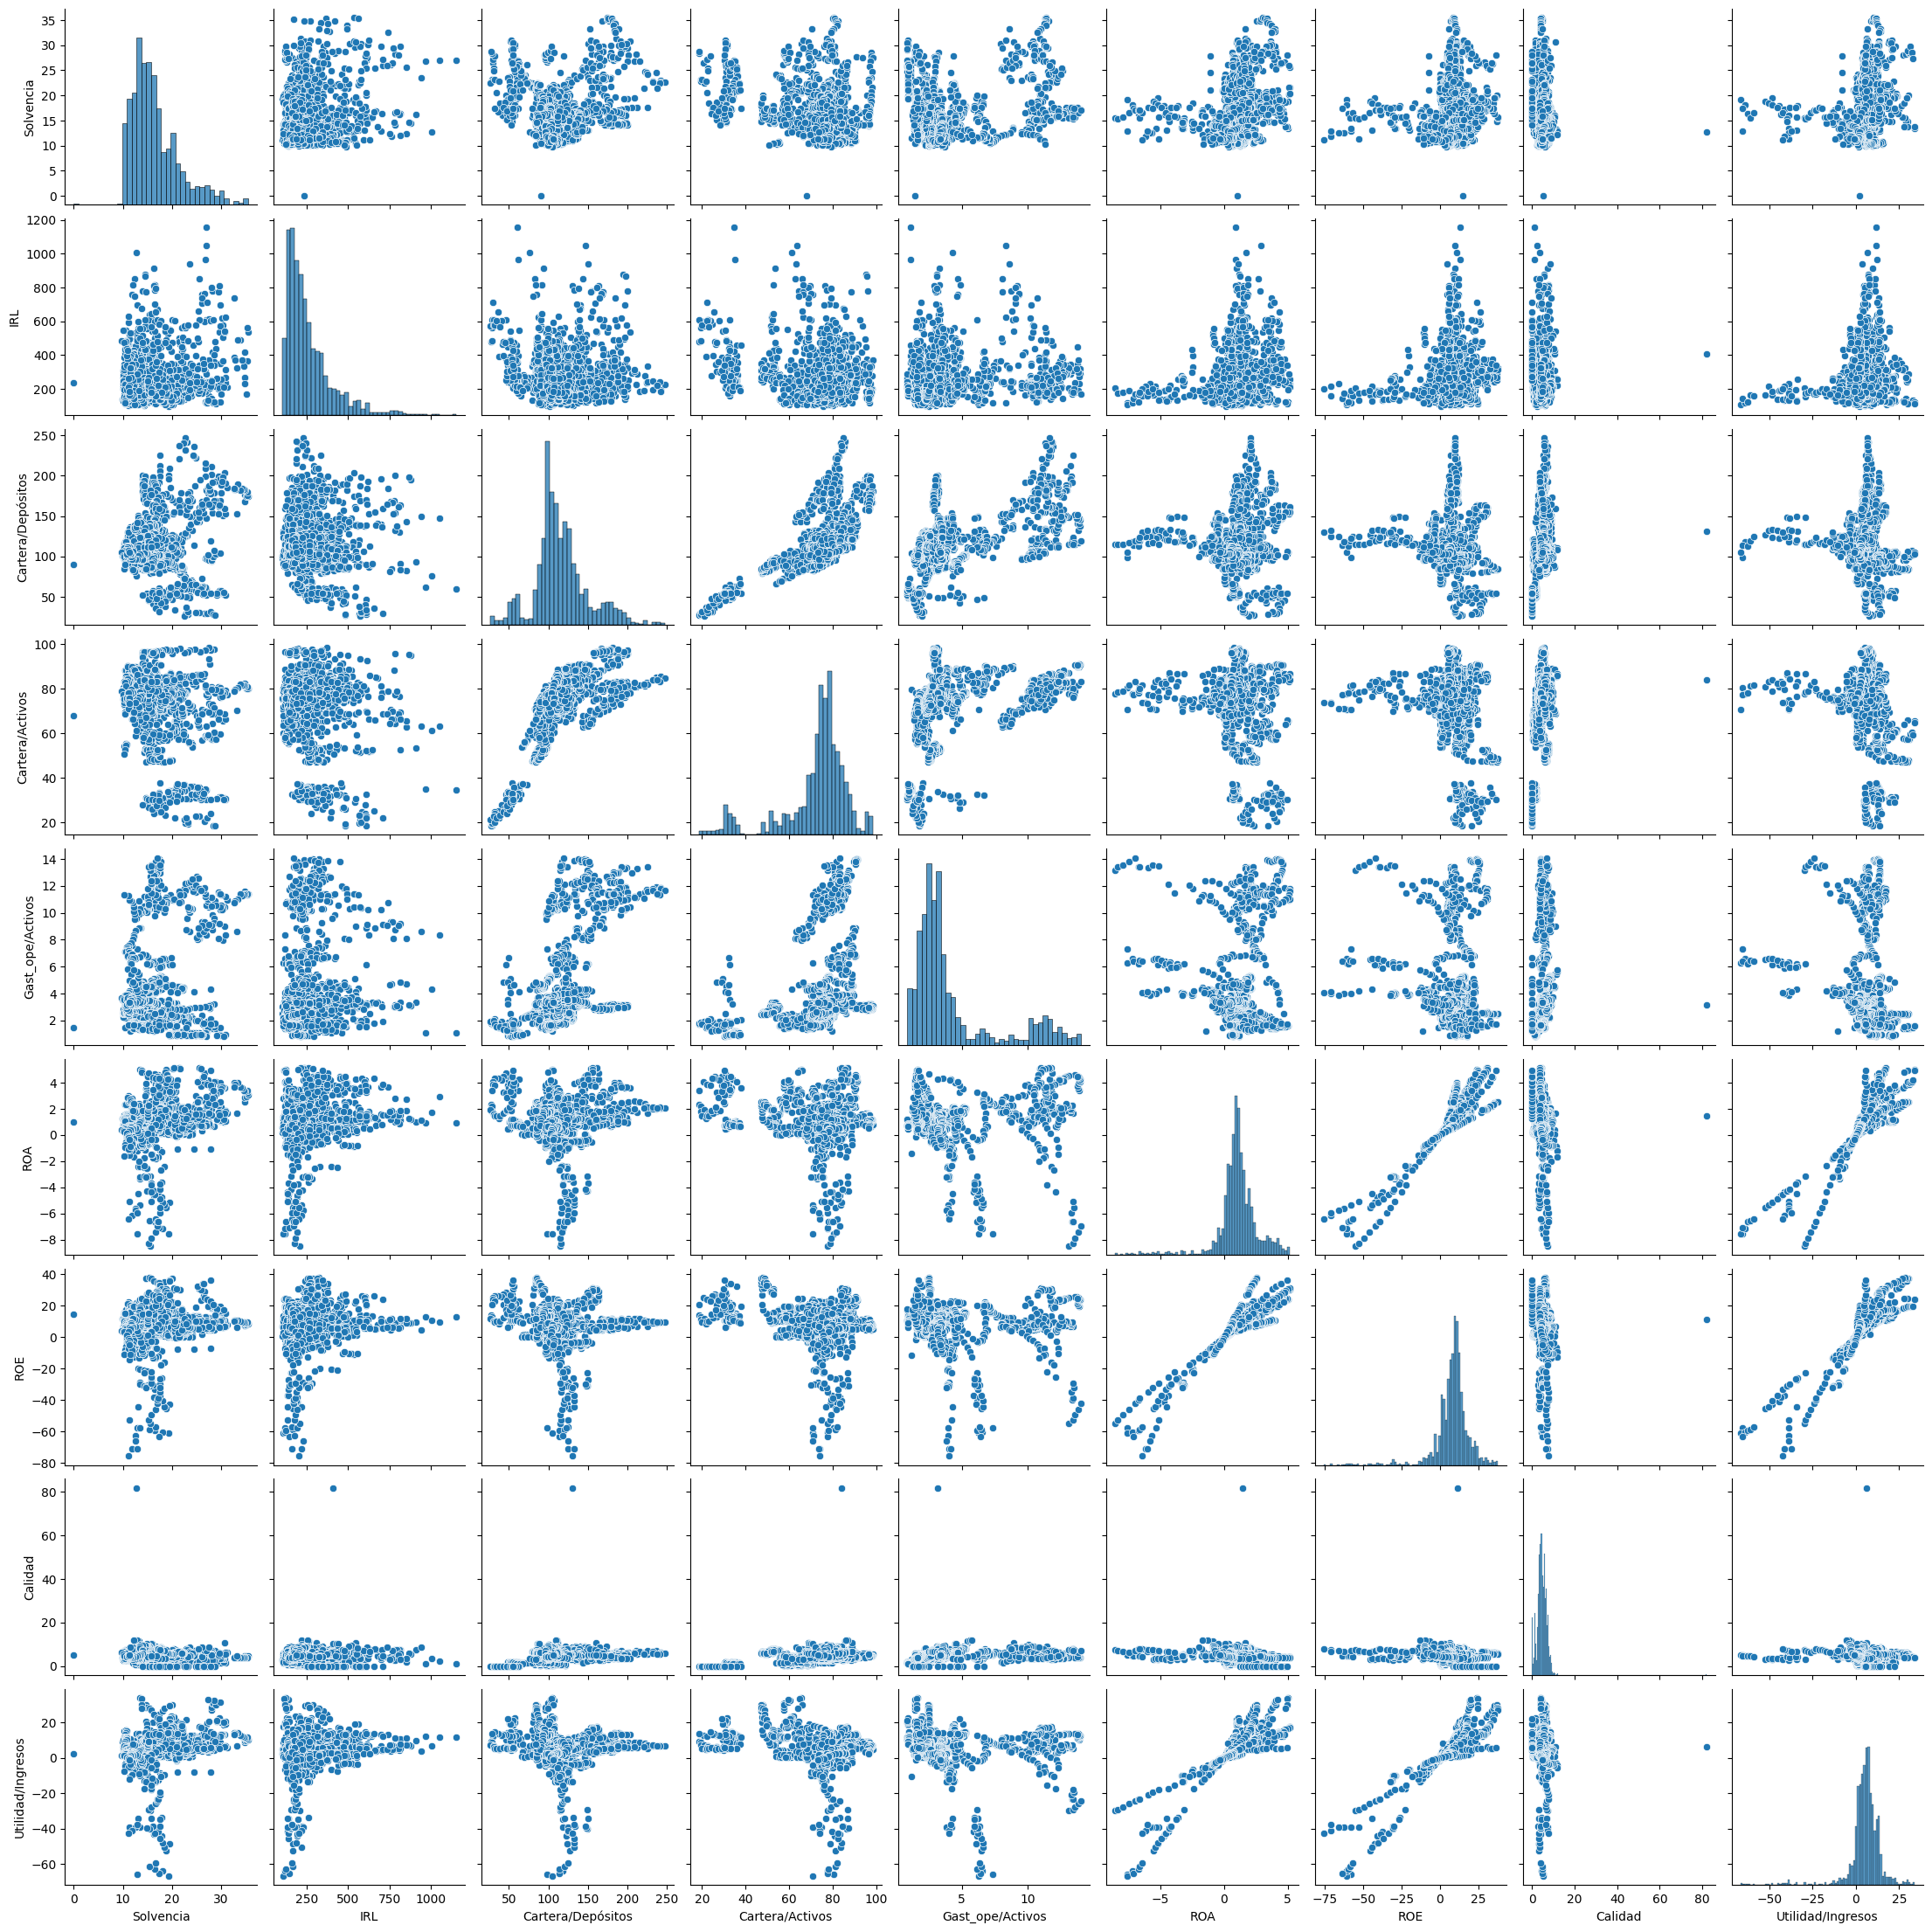

In [14]:
sns.pairplot(datos, kind="scatter")
plt.show()

<ipython-input-15-37c56fb7f2d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datos.corr()
<ipython-input-15-37c56fb7f2d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(datos.corr(), cmap="YlGnBu", annot=True)


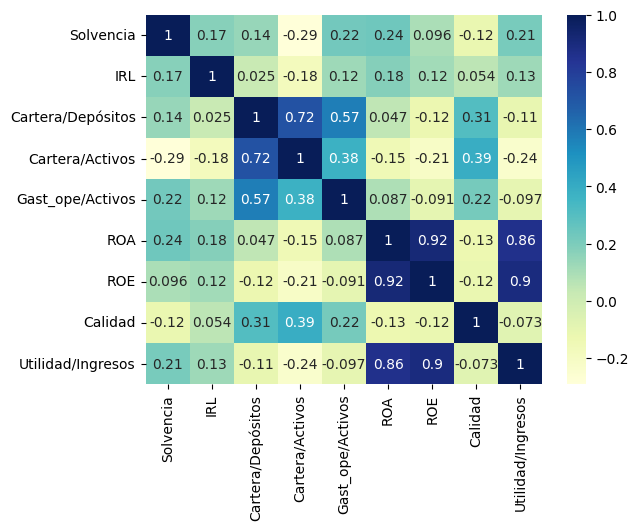

                   Solvencia       IRL  Cartera/Depósitos  Cartera/Activos  \
Solvencia           1.000000  0.172477           0.137875        -0.292106   
IRL                 0.172477  1.000000           0.025042        -0.177246   
Cartera/Depósitos   0.137875  0.025042           1.000000         0.722243   
Cartera/Activos    -0.292106 -0.177246           0.722243         1.000000   
Gast_ope/Activos    0.224075  0.124938           0.573792         0.375280   
ROA                 0.235506  0.177540           0.046819        -0.148404   
ROE                 0.096074  0.116054          -0.122926        -0.213431   
Calidad            -0.120237  0.053947           0.305932         0.392151   
Utilidad/Ingresos   0.207849  0.125778          -0.107895        -0.240576   

                   Gast_ope/Activos       ROA       ROE   Calidad  \
Solvencia                  0.224075  0.235506  0.096074 -0.120237   
IRL                        0.124938  0.177540  0.116054  0.053947   
Cartera/Depó

In [15]:
correlation_matrix = datos.corr()
dataplot = sns.heatmap(datos.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
mp.show()
print(correlation_matrix)

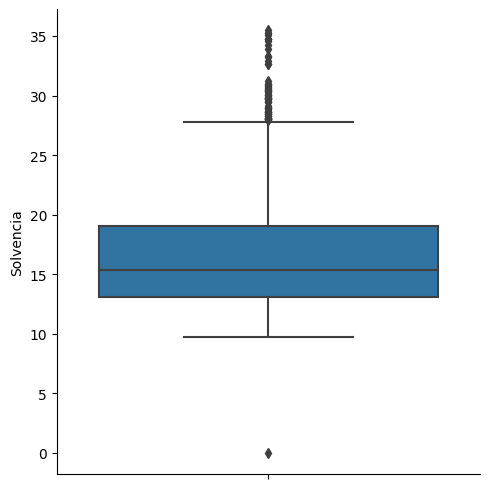

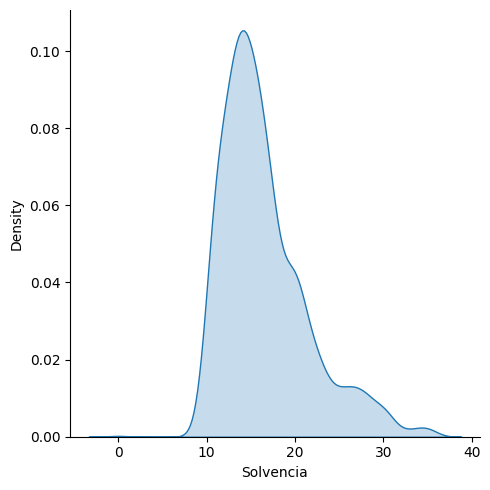

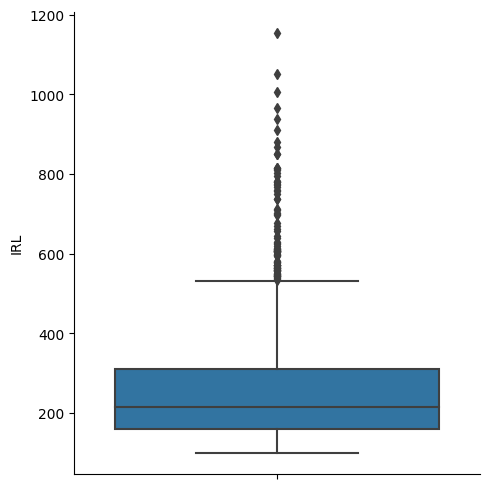

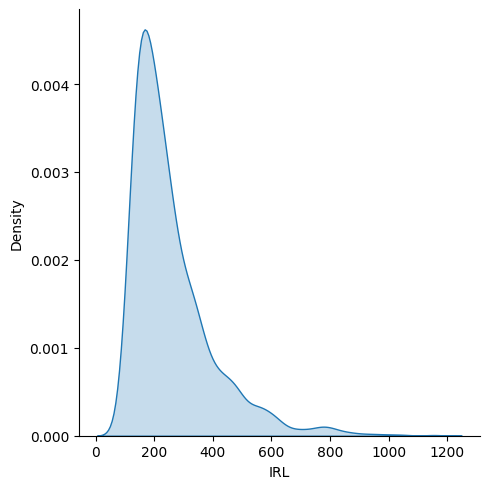

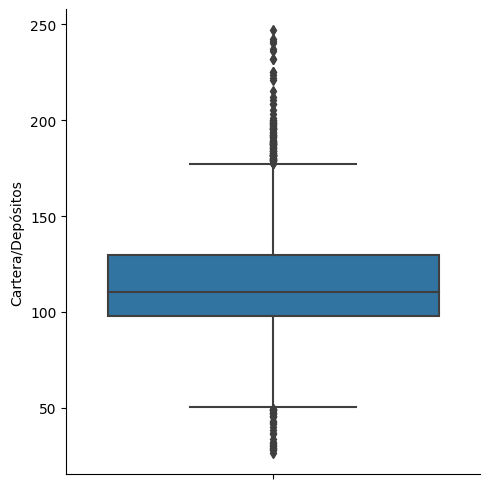

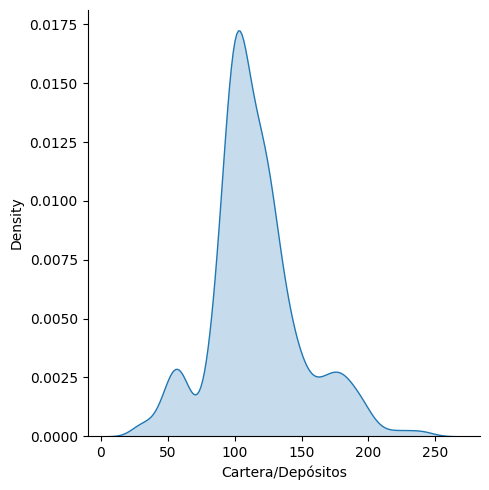

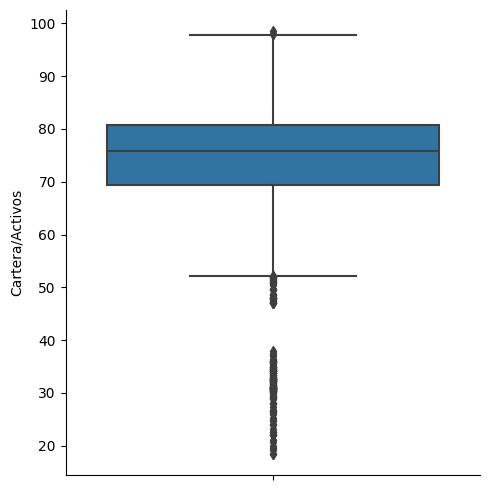

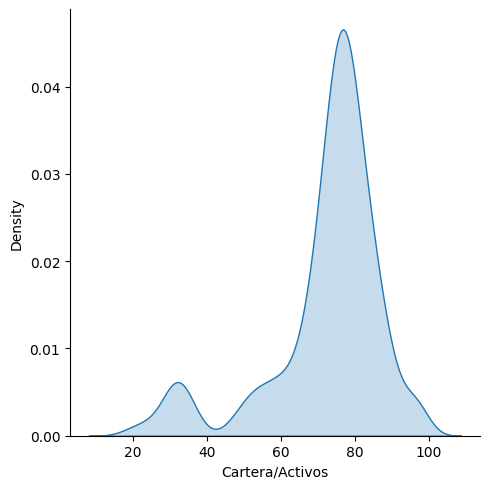

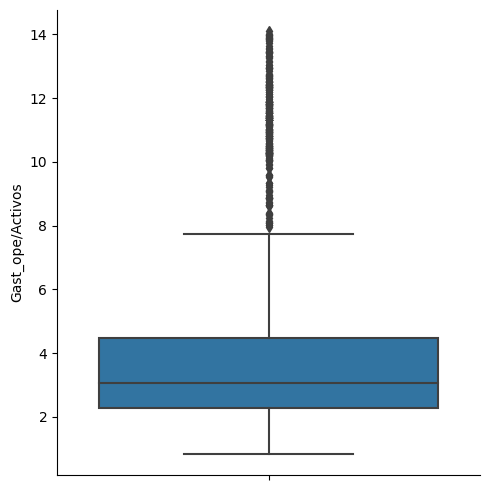

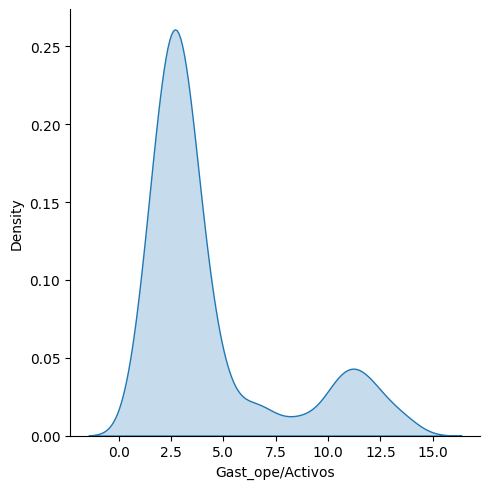

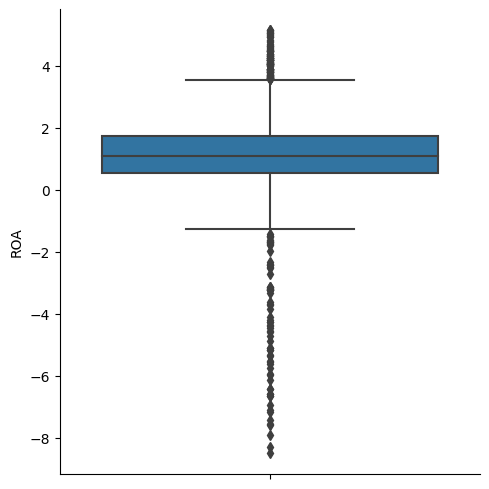

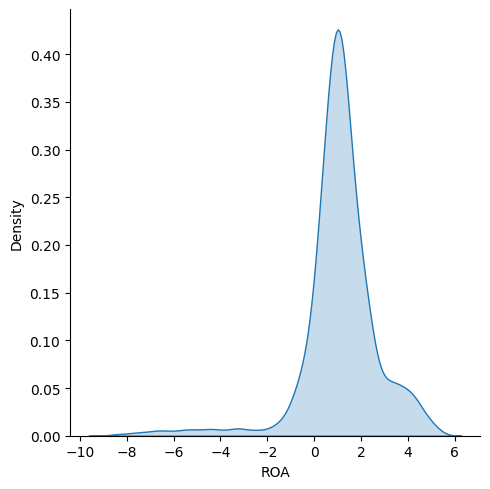

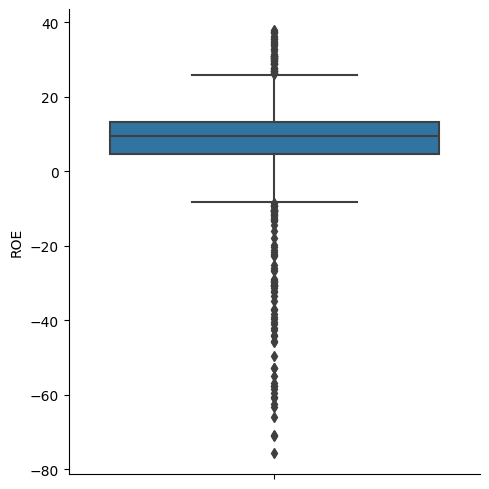

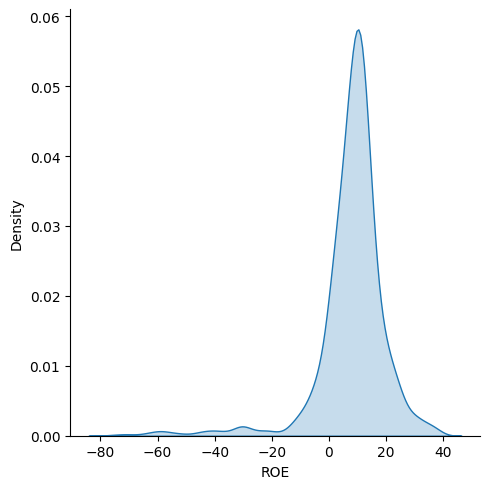

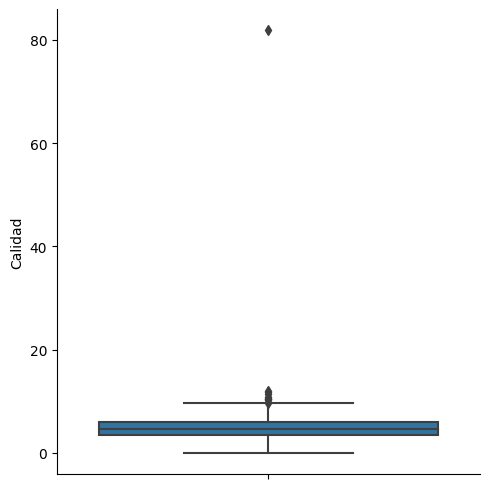

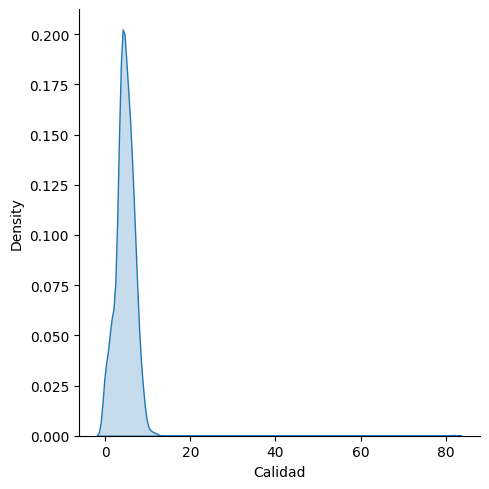

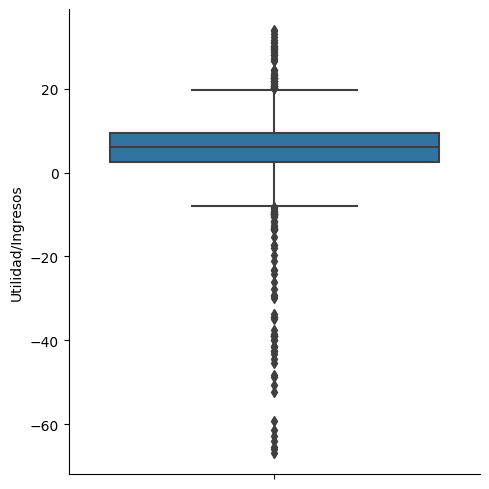

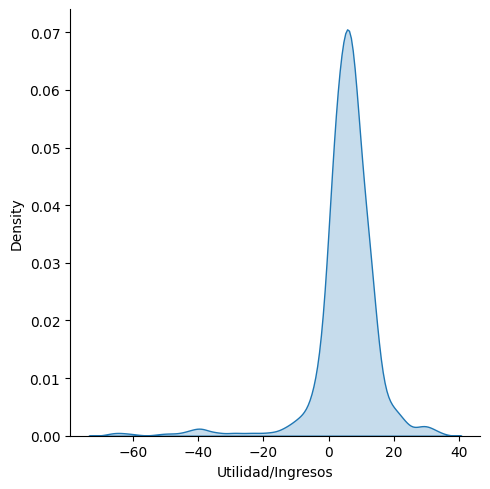

In [16]:
for i in AtributosNumericos:
  sns.catplot(data=datos, y=i, kind="box",margin_titles=True)
  sns.displot(datos, x=i, kind="kde",fill=True,common_norm=False)

**A partir del cuadro podemos mencionar las siguientes conclusiones:**

**Utilidad/ingresos vs. ROA y ROE:** Existe una correlación lineal positiva muy fuerte entre la utilidad como proporción de los ingresos y las medidas de rentabilidad ROA y ROE. Esto sucede pues a mayores utilidades es de esperarse que también se incrementen estas medidas pues también tienen de numerador a las utilidades.
**Cartera/Depósitos vs. Gast_Op/Activos:** Existe una correlación lineal positiva (0.57) entre la relación Cartera/Depósitos y el gasto operativo como proporción de los activos. Esto sugiere que a medida que la proporción de cartera aumenta, el gasto operativo también aumenta.
**Cartera/Activos vs. solvencia e IRL:** Si una entidad está muy expuesta a cartera su solvencia e IRL se ven reducidos.
**Cartera/Activos, Cartera/Depósitos y calidad:**  entre más expuesta esté una entidad a cartera también está expuesta a que hayan más incumplimiento por deudores y por ende el indicador de calidad puede incrementar




